# Section 1 : Business understanding 

### Explore OSMI survey datasets of 2020
###    About OSMI - Open Sourcing Mental Illness
    Open Sourcing Mental Illness is a non-profit corporation dedicated to raising awareness, educating, and providing resources to support mental wellness in the tech and open source communities.  
    Open Sourcing Mental Illness is a non-profit, 501(c)(3) corporation dedicated to raising awareness, educating, and providing resources to support mental wellness in the tech and open source communities.
https://osmihelp.org/

    Every year, OSMI publishes a survey report since 2016  

### OSMI Mental Health In Tech Survey 2020

    This dataset was published on Kaggle the 2nd of January based on 2020 survey.
https://www.kaggle.com/osmihelp/osmi-2020-mental-health-in-tech-survey-results   
I will analyze this survey data to answer some questions about the mental impact of covid-19 on tech workers


### Question 1: How people impacted by mental issues are willing and educated to evaluate their limitations.

### Question 2: How people with mental disabilities are willing to talk about it to their colleagues and employers?

### Question 3: How people with mental disabilities are trusting their companies to process privately their information?










## 1. Data overview

Observations:
1. The dataset is composed by 180 answers to the survey.
2. The survey is composed by 120 questions
3. Many NaN values because answering to some questions was not mandatory or because some questions were not always relevant as: 
 1. The US state when you already answered working in US
 2. Question related employers for self-employed people



### Gather OSMI 2020 survey dataset


In [1]:
#!pip install pandas_profiling

import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling as pp

df = pd.read_csv('data/OSMI/OSMI-2020.csv')
print('Shape of the dataframe = ' , df.shape)

Shape of the dataframe =  (180, 120)


# Section 2 : Data understanding


In [2]:
df.head(2)

,#,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,...,"If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.",Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.),What is your age?,What is your gender?,What country do you *live* in?,What US state or territory do you *live* in?,What is your race?,Other.3,What country do you *work* in?,What US state or territory do you *work* in?
0,zwrffw6ykfo82ft1twvzwrffw6c6wsfv,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,45,Male,United States of America,Connecticut,White,NaN,United States of America,Connecticut
1,zhdmhaa8r0125c4zmoi7qzhdmtjrakhm,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,24,female,Russia,NaN,NaN,NaN,Russia,NaN


# Section 3 : Data Preparation


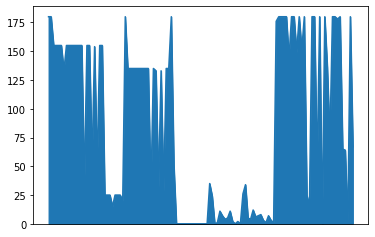

In [3]:
# Counting values by column
values_by_columns = df.notnull().sum()

values_by_columns.plot(kind='area', xticks=[]);

#### 81 questions have more than 10% of answeers. The other 29 will not be included in this first analysis

## Clean


Number of questions with enough answers -->  81


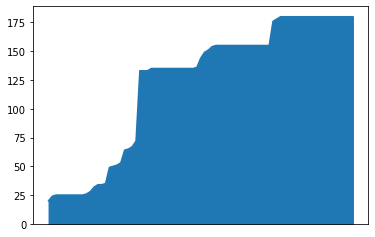

In [4]:
columns_with_answers = values_by_columns[values_by_columns > 18].sort_values()
print('Number of questions with enough answers --> ', columns_with_answers.count())

columns_with_answers.plot(kind='area', xticks=[]);

### By plotting the number of values by columns, we can observe a stairs effect. Each level will be investigated.
    
- 20   columns have 180 values (0 NaN)

- 15   columns have 155 values (25 NaN) 
- 8    columns have 25 values (155 NaN)

- 12   columns have 135 values

- 3   columns have 133 values


    
    
--------------------
### Analyze the hypothesis that the various columns with 155 or 25 values are related to the 155 employees and 25 self-contractors

The display of the questions with 155 values and the ones with 25 values do not validate nor discard the hypothesis.  
Let's check if the answeers match one by one.

In [5]:
columns_with_155_answers = columns_with_answers[columns_with_answers == 155].keys().to_list()
rows_employees = df['*Are you self-employed?*'] == 0 

df.loc[rows_employees, columns_with_155_answers].notnull().sum()

Is your employer primarily a tech company/organization?                                                                                           155
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?            155
Does your employer offer resources to learn more about mental health disorders and options for seeking help?                                      155
Does your employer provide mental health benefits as part of healthcare coverage?                                                                 155
If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?              155
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?    155
Have you ever discussed your mental health with coworkers?                                          

In [6]:
columns_with_25_answers = columns_with_answers[columns_with_answers == 25].keys().to_list()
rows_self_employed = df['*Are you self-employed?*'] == 1 

df.loc[rows_self_employed, columns_with_25_answers].notnull().sum()

Do you know local or online resources to seek help for a mental health issue?                                                                                                         25
Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.     6
If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?                                                          25
If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?                                                               25
Do you believe your productivity is ever affected by a mental health issue?                                                                                                           25
Has being identified as a person with a mental health issue affected your c

In [7]:
df.loc[rows_employees, columns_with_25_answers].notnull().sum()

Do you know local or online resources to seek help for a mental health issue?                                                                                                          0
Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.    19
If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?                                                           0
If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?                                                                0
Do you believe your productivity is ever affected by a mental health issue?                                                                                                            0
Has being identified as a person with a mental health issue affected your c

### Result on the hypothesis 155+25 validation

The hypothesis was partially validated as:
- All the 155 answers of the columns with 155 values were provided by employees
- Not all the 25 answers of the columns with 25 values were provided by self-employed. Only two questions could not justify the 155 NaN because were answered by a mix of employees self-contractors



    
    
---------------
### Analyze the group of 12 column with 135 values

The 12 questions content are related to previous employer topics.  
I propose the hypothesis that the 12 questions with 135 answers were provided only by people with a specific answer to the other question '*Do you have previous employers?*'


In [8]:
# List of questions with exactly 135 values
columns_with_answers[columns_with_answers == 135]

Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?    135
Overall, how much importance did your previous employer place on physical health?                                                               135
Overall, how much importance did your previous employer place on mental health?                                                                 135
Did you ever discuss your mental health with your previous employer?                                                                            135
Would you have been willing to discuss your mental health with your direct supervisor(s)?                                                       135
Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?                        135
Did your previous employers provide resources to learn more about mental health disorders and how to seek help? 

In [9]:
# 135 persons answered that they had previous employers 

df['*Do you have previous employers?*'].value_counts()

1    135
0     45
Name: *Do you have previous employers?*, dtype: int64

In [10]:
columns_with_135_answers = columns_with_answers[columns_with_answers == 135].keys().to_list()
rows_previous_employer = df['*Do you have previous employers?*'] == 1 

df.loc[rows_previous_employer, columns_with_135_answers].notnull().sum()


Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?    135
Overall, how much importance did your previous employer place on physical health?                                                               135
Overall, how much importance did your previous employer place on mental health?                                                                 135
Did you ever discuss your mental health with your previous employer?                                                                            135
Would you have been willing to discuss your mental health with your direct supervisor(s)?                                                       135
Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?                        135
Did your previous employers provide resources to learn more about mental health disorders and how to seek help? 

### Result on the hypothesis 135 with previous employer
The hypothesis was validated as all the 135 answers to the questions with 135 values were provided by people that declared having previous employer


    
    
-----------------------------------------------------------------------------------------------------
### Analyze the group of 3 column with 133 values

The 3 questions content are also related to current or previous employers topics.

I propose the hypothesis that the 12 questions with 135 answeers were provided only by people with a specific answers to the other question '*Do you have previous employers?*'


In [11]:
columns_with_answers[columns_with_answers == 133]

Did you ever have a previous coworker discuss their or another coworker's mental health with you?         133
Do you know the options for mental health care available under your employer-provided health coverage?    133
Did you ever discuss your mental health with a previous coworker(s)?                                      133
dtype: int64

In [12]:
columns_with_133_answers = columns_with_answers[columns_with_answers == 133].keys().to_list()

df.loc[rows_previous_employer, columns_with_133_answers].notnull().sum()

Did you ever have a previous coworker discuss their or another coworker's mental health with you?         133
Do you know the options for mental health care available under your employer-provided health coverage?     97
Did you ever discuss your mental health with a previous coworker(s)?                                      133
dtype: int64

In [13]:
df.loc[rows_employees, columns_with_133_answers].notnull().sum()

Did you ever have a previous coworker discuss their or another coworker's mental health with you?         116
Do you know the options for mental health care available under your employer-provided health coverage?    133
Did you ever discuss your mental health with a previous coworker(s)?                                      116
dtype: int64

### Result on the hypothesis 133 with current or previous employer
The hypothesis was validated as all the 133 answers to the questions with 133 values were provided by people that declared having a current or a previous employer


## Conclusion of the data preparation

- 81 of the 120 questions will be used in this analysis because they contained more than 10% of the values
- Suspicious groups of columns with the same numbers of NaN values were investigated. It seems that some questions were not proposed during the survey based on previous questions:
    - Questions about previous employer were only asked to the 155 persons who declared having a previous employer
    - Questions about current employer were only asked to the 135 persons who declared having a current employer
- Other NaN values could be found but they are minor and should be study one at the time    

-----------


# Evaluation


# Question 1 - Knowing mental issues
One of the first steps to reintegrate a person with a recent physically disability is to evaluate the new limitations/possibilities of that person.  
I wanted to know ***how people impacted by mental issues are willing and educated to evaluate their limitations.***  
Here are some questions of the survey that are related to that level of knowledge 


## Visualize data on knowledge level

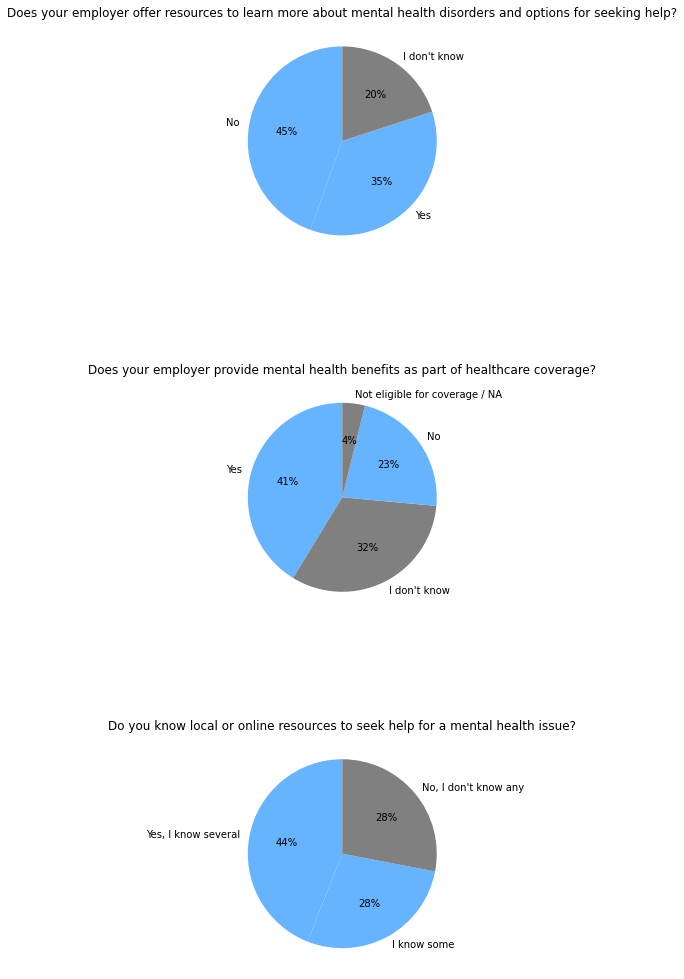

In [14]:
questions_for_A = ['Does your employer offer resources to learn more about mental health disorders and options for seeking help?', 
                   'Does your employer provide mental health benefits as part of healthcare coverage?', 
                   'Do you know local or online resources to seek help for a mental health issue?']

answers_for_A_implies_knowing = [['Yes','No' ],
                                 ['Yes', 'No'],
                                 ['Yes, I know several', 'I know some']]


def plot_questions_on_pie(survey_df, questions , answers_to_highlights):
    '''
    INPUT:
        survey_df - the pandas dataframe containing all the survey data
        questions - list of questions to plot
        answers_to_highlights - list of lists of values to highlight for each answer of Question 
        
    OUTPUT:
        N/A
    '''
    df_A =[]
    for q in questions:
        df_A.append(survey_df[q].value_counts())

    df_A_len = len(df_A)
    fig, axs = plt.subplots(df_A_len, 1, figsize=[5, 5 * df_A_len]);
    fig.set_tight_layout(True)

    for i in range(df_A_len):
        axs[i].set_title(questions[i], wrap=True, fontsize=12);
        df_A_i_keys = df_A[i].keys()
        ax_colors = []
        for k in df_A_i_keys:
            if(k in answers_to_highlights[i]):
                ax_colors.append('#66b3ff')
            else:
                ax_colors.append('grey')

        axs[i].pie(df_A[i], colors = ax_colors, labels=df_A_i_keys, startangle=90, autopct='%1.f%%');


plot_questions_on_pie(df, questions_for_A, answers_for_A_implies_knowing)


### Explanation for visualisation - Knowing mental issues
We can see that most of the answers provided to these three questions implies knowledge about mental health benefits, or access to resources to learn from (blue zones above).  

We should also remember that this survey was mainly completed by people interested in this topic since they were ready to invest 10-20 minutes voluntarily.  
We could expect lower values for knowledge or information access if the survey was repeated with a general population.   



-----------

# Question 2 - communication at work
To reintegrate workplace even remotely, a person should be able to talk about their limitations and the possible accommodations that could improve their work day.   
**How people with mental disabilities are willing to talk about it to their colleagues and employers?**



## Visualize data on communication at work 

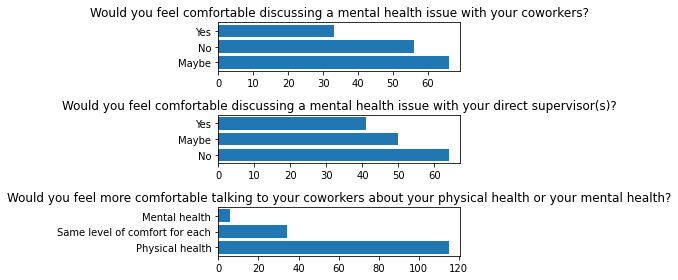

In [26]:
questions_for_B = [ 'Would you feel comfortable discussing a mental health issue with your coworkers?',
                    'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?',
                    'Would you feel more comfortable talking to your coworkers about your physical health or your mental health?']

df_B =[]
for q in questions_for_B:
    df_B.append(df[q].value_counts())

df_B_len = len(df_B)
fig, axs = plt.subplots(df_B_len, 1);
fig.set_tight_layout(True)

for i in range(df_B_len):
    axs[i].set_title(questions_for_B[i], wrap=True, fontsize=12);
    df_B_i_keys = df_B[i].keys()
    axs[i].barh(y= df_B_i_keys, width= df_B[i] )
    

### Explanation for visualisation - communication at work

Based on the survey, we should not expect people to easily share their situation with colleagues or superiors at work.  
It looks like, it is easier to talk about physical issues than the mental ones. 



-----------

# Question 2 -  data privacy

People working while having mental health issues try to find the just amount of information to share with their colleagues and superior.   
It is important for them to feel in control of that amount of information and to trust the company and insurance.  
**How people with mental disabilities are trusting their companies to process privately their information?**


## Visualize data privacy

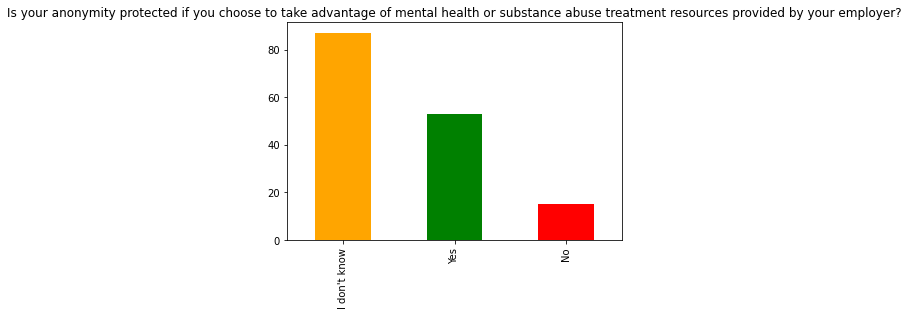

In [27]:
question_for_C = 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?'

df_C_0 = df[question_for_C].value_counts()

ax = df_C_0.plot.bar(color=['orange','green', 'red']);
ax.set_title(question_for_C, fontsize=12);

### Explanation for visualisation - data privacy

It looks like people do not think that data privacy about their mental condition will be respected by company employees or company insurance. 
This should be investigated and fixed since some people would decide to not take advantage of useful resources; to avoid personal information to be spread across their colleagues or superiors.

--------



## Conclusions:
    
Fear of others seems to be an unnecessary difficulty experienced by people struggling to balance work with their mental issues.  

Even if many mental illnesses could be fixed today or at least treated to allow a successful and happy career, improvements should be done on the personal and professional sides of our society.  
Parents, schools, friends should share knowledge about how to recognize, to accept, and to find treatments for mental issues, from the little scratches to the one that requires a professional.   
Since jobs will become more mental than physical, it is primordial to accelerate the education of people and company managers.  

We should be able to speak about stress, anxiety, depression as we speak about back pain, hangover, and our last visit to the dentist.
